##### 베르누이분포와 이항분포는 확률분포 중 가장 단순한 분포지만 분류분제에서 널리 사용된다. 

이 절에서는 두 분포의 개념을 알아보고 이 분포들이 스팸메일 필터링에 어떻게 쓰이는지 살펴본다.

### 베르누이 시행

결과가 두 가지 중 하나로만 나오는 실험이나 시행을 베르누이 시행(Bernoulli trial)이라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것도 베르누이 시행이다.

### 베르누이 확률변수

베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것을 베르누이 확률변수(Bernoulli random variable)라고 한다. 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)다. 베르누이 확률변수의 표본값은 보통 정수 1과 0으로 표현하지만 때로는 정수 1과 -1로 표현하는 경우도 있다.

### 베르누이 확률분포
베르누이 확률변수의 분포를 베르누이 확률분포 혹은 베르누이분포라고 한다. 만약 어떤 확률변수  𝑋 가 베르누이분포에 의해 발생된다면 ’확률변수  𝑋 가 베르누이분포를 따른다’라고 말하고 다음과 같이 수식으로 쓴다.

$$X \sim \text{Bern}(x;\mu)$$

베르누이분포의 확률질량함수 수식은 다음과 같다.

$$\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}$$

베르누이분포는 1이 나올 확률을 의미하는  𝜇 라는 모수(parameter)를 가진다. 변수와 모수는 세미콜론(;, semi-colone)기호로 분리했다. 0이 나올 확률은  1−𝜇 이다.

위 식을 하나의 수식으로 표현하면 다음과 같이 쓸 수 있다.

$$\text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)}$$

### Practice 1

위 식에서  𝑥=1 과  𝑥=0 을 각각 대입하여 원래의 확률질량함수 수식이 나오는 것을 확인한다.

만약 베르누이 확률변수의 표본값이 1과 0이 아니라 1과 -1이라는 값을 가진다면 다음과 같은 수식으로 써야 한다.

$$\text{Bern}(x; \mu) = \mu^{(1+x)/2} (1-\mu)^{(1-x)/2}$$

### SciPy를 이용한 베르누이 확률변수의 시뮬레이션

SciPy의 stats 서브 패키지에 있는 bernoulli 클래스는 베르누이 확률변수를 구현했다. p 인수로 분포의 모수  𝜇 을 설정한다.

다음 예에서는 p=0.6 으로 설정했다. 이러한 확률변수를 만든 것은 앞변이 나올 확률이 0.6인 동전을 만든 것과 같다.

In [2]:
import scipy as sp
import scipy.stats

mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

확률질량함수의 메서드는 pmf다.

In [7]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 13

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

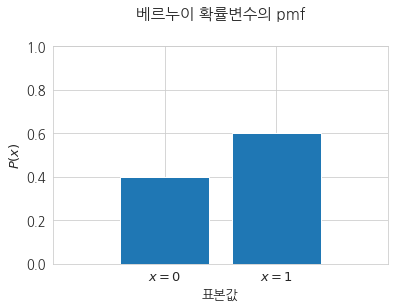

In [10]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["$x=0$", "$x=1$"])
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("베르누이 확률변수의 pmf", y=1.1)
plt.show()

표본값을 무작위로 생성하려면 rvs 메서드를 사용한다. 다음 코드는 표본 100개를 생성한다. 이는 위에서 만든 동전을 100번 던져 나온 결과를 나타낸 것과 같다. 그래서 확률변수의 표본을 생성하는 작업을 시뮬레이션(simulation)이라고도 부른다.

In [11]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

다음은 생성 결과를 seaborn의 countplot 명령으로 시각화한 것이다.

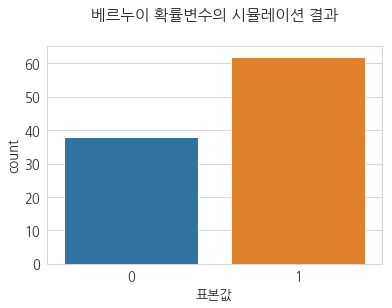

In [13]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과", y=1.1)
plt.xlabel("표본값")
plt.show()

이론적인 확률분포와 표본의 확률분포를 동시에 보이려면 다음과 같은 코드를 사용한다.

In [14]:
import pandas as pd

y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,시뮬레이션,이론
0,0.38,0.4
1,0.62,0.6


In [15]:
rv.pmf(xx)

array([0.4, 0.6])

In [16]:
y

array([0.38, 0.62])

In [17]:
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

seaborn의 barplot 명령으로 시각화하면 다음과 같다.

In [19]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,시뮬레이션,0.38
1,0,이론,0.40
2,1,시뮬레이션,0.62
3,1,이론,0.60


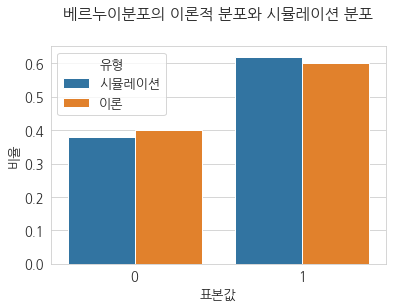

In [21]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포", y=1.1)
plt.show()

### Practice 2

베르누이 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기대값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 바 플롯을 그린다. 표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. 𝜇=0.5 
2. 𝜇=0.9

In [22]:
rv1 = sp.stats.bernoulli(0.5)
rv2 = sp.stats.bernoulli(0.9)

In [23]:
x1 = rv1.rvs(10, random_state=0)
x2 = rv1.rvs(1000, random_state=0)

In [24]:
x1.mean(), x1.var(ddof=1)

(0.7, 0.23333333333333334)

In [26]:
x2.mean(), x2.var(ddof=1)  # 데이터 수가 많아지면서 0.5에 가까워짐

(0.483, 0.249960960960961)

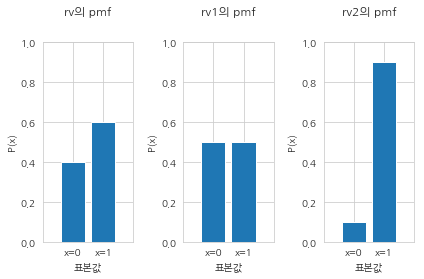

In [37]:
%matplotlib inline
xx = [0, 1]
plt.subplot(131)
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("rv의 pmf", y=1.1)

plt.subplot(132)
pmf = rv1.pmf(xx)
plt.bar(xx, pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("rv1의 pmf", y=1.1)

plt.subplot(133)
pmf = rv2.pmf(xx)
plt.bar(xx, pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("rv2의 pmf", y=1.1)

plt.tight_layout()
plt.show()

In [35]:
x3 = rv2.rvs(10)
x4 = rv2.rvs(1000)

x3.mean(), x3.var(ddof=1)

(0.9, 0.1)

In [36]:
x4.mean(), x4.var(ddof=1)

(0.884, 0.10264664664664666)

### 베르누이분포의 모멘트
베르누이분포의 모멘트는 다음과 같다.

#### 기대값

$$\text{E}[X]  = \mu$$

#### 분산
$$\text{Var}[X] = \mu(1-\mu)$$

앞의 예에서는  𝜇=0.6 이였으므로 이론적인 기댓값과 분산은 다음과 같다.

$$\text{E}[X] = 0.6$$

$$\text{Var}[X] = 0.6 \cdot (1 - 0.6) = 0.24$$

데이터에서 계산한 표본평균 및 표본분산은 다음과 같이 계산한다.

In [38]:
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [39]:
np.mean(x)

0.62

In [41]:
np.var(x, ddof=1)

0.23797979797979804

기술통계값들은 SciPy가 제공하는 describe 명령으로 계산할 수도 있다.

In [43]:
s = sp.stats.describe(x)
s[2], s[3]  # mean, variance

(0.62, 0.23797979797979804)

### 이항분포

성공확률이  𝜇  인 베르누이 시행을  𝑁 번 반복하는 경우를 생각해보자. 가장 운이 좋을 때에는  𝑁 번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 것이다.  𝑁 번 중 성공한 횟수를 확률변수  𝑋 라고 한다면  𝑋 의 값은 0 부터  𝑁  까지의 정수 중 하나가 될 것이다.

확률변수를 이항분포(binomial distribution)를 따르는 확률변수라고 하며 다음과 같이 표시한다.

$$X \sim \text{Bin}(x;N,\mu)$$

베르누이분포와 이항분포는 모두 베르누이 확률변수에서 나온 표본값이다. 표본 데이터가 하나 뿐이면 베르누이분포가 되고 표본 데이터가 여럿이면 이항분포가 된다.
이항분포 확률변수  𝑋 의 확률질량함수를 구해보자. 우선 베르누이 확률 분포를 따르는 확률변수  𝑌 를 가정한다.

$$Y \sim \text{Bern}(y;\mu)$$

이 확률변수의  𝑁 개의 표본을  𝑦1,𝑦2,⋯,𝑦𝑁 라고 하자. 이 값은 모두 0(실패) 아니면 1(성공)이라는 값을 가지기 때문에  𝑁 번 중 성공한 횟수는  𝑁 개의 표본값의 합(sum)이다.

$$x = \sum_{i=1}^N y_i$$

베르누이분포를 따르는 확률변수  𝑌 의 확률질량함수를 대입하여 정리하면 이항분포 확률변수  𝑋 의 확률질량함수는 다음과 같아진다.

$$\text{Bin}(x;N,\mu) = \binom N x  \mu^x(1-\mu)^{N-x}$$

이 식에서  (𝑁𝑥)  기호는 조합(combination)이라는 기호로  𝑁 개 원소 중에  𝑥 개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$\binom N x =\dfrac{N!}{x!(N-x)!}$$

!  기호는 팩토리얼(factorial)이라고 하며 다음처럼 정의한다.

$$N! = N\cdot (N-1) \cdots 2 \cdot 1$$

### SciPy를 사용한 이항분포의 시뮬레이션

이항분포 확률변수는 사이파이의 stats 서브패키지에 binom 클래스로 구현되어 있다. n 인수로 전체 시행 횟수  𝑁 를 넣고 p 인수로 베르누이 확률 분포의 기대값  𝜇 를 넣는다.

In [45]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

확률질량함수는 다음과 같다.

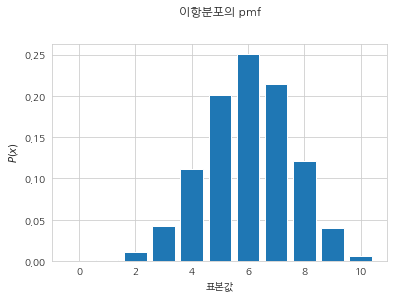

In [47]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 pmf", y=1.1)
plt.show()

rvs 메서드로 시뮬레이션을 한 결과는 다음과 같다.

In [49]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

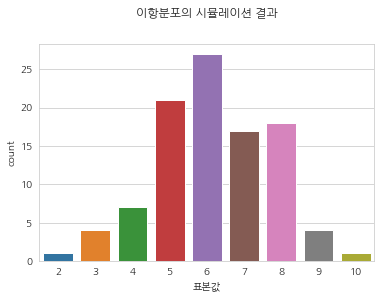

In [51]:
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과", y=1.1)
plt.xlabel("표본값")
plt.show()

이론적인 확률분포와 표본의 확률분포를 같이 나타내려면 다음과 같은 코드를 사용한다.

In [57]:
N = 10
y = np.bincount(x, minlength=N+1) / float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack().reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


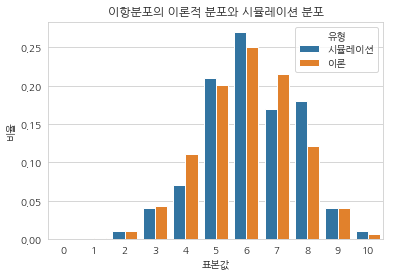

In [58]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 이항분포의 모멘트

이항분포의 기대값과 분산은 각각 다음과 같다.

#### 기대값

$$\text{E}[X] = N\mu$$

#### 분산

$$\text{Var}[X] = N\mu(1-\mu)$$

### Practice 3

이항 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기대값과 분산을 구하고 앞의 예제와 같이 확률질량함수와 비교한 바 플롯을 그린다.

표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. 𝜇=0.5 ,  𝑁=5 
2. 𝜇=0.9 ,  𝑁=20

In [59]:
rv1 = sp.stats.binom(5, 0.5)
rv2 = sp.stats.binom(20, 0.9)

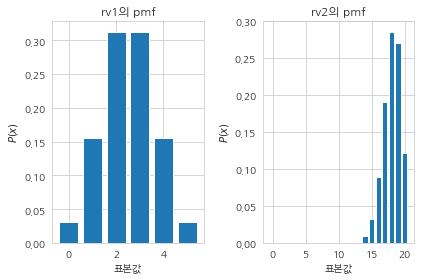

In [61]:
# 이항분포의 확률질량함수
plt.subplot(121)
xx = np.arange(5 + 1)
plt.bar(xx, rv1.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("rv1의 pmf")

plt.subplot(122)
xx = np.arange(20 + 1)
plt.bar(xx, rv2.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("rv2의 pmf")

plt.tight_layout()
plt.show()

In [63]:
np.random.seed(0)

x1 = rv1.rvs(10)
x2 = rv1.rvs(1000)
x3 = rv2.rvs(10)
x4 = rv2.rvs(1000)

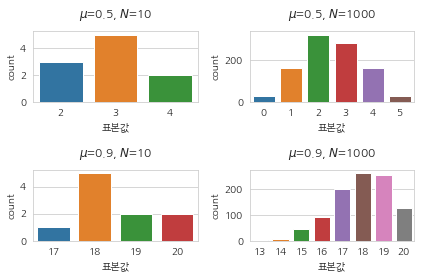

In [66]:
# 이항분포의 시뮬레이션 결과
plt.subplot(221)
sns.countplot(x1)
plt.title("$\mu$=0.5, $N$=10", y=1.1)
plt.xlabel("표본값")

plt.subplot(222)
sns.countplot(x2)
plt.title("$\mu$=0.5, $N$=1000", y=1.1)
plt.xlabel("표본값")

plt.subplot(223)
sns.countplot(x3)
plt.title("$\mu$=0.9, $N$=10", y=1.1)
plt.xlabel("표본값")

plt.subplot(224)
sns.countplot(x4)
plt.title("$\mu$=0.9, $N$=1000", y=1.1)
plt.xlabel("표본값")

plt.tight_layout()
plt.show()

이론적 확률분포와 표본의 확률분포 비교

In [68]:
y = np.bincount(x1, minlength=5+1) / float(len(x1))
xx = np.arange(5 + 1)
df = pd.DataFrame({"이론": rv1.pmf(xx), "시뮬레이션": y}).stack().reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.00000
1,0,이론,0.03125
2,1,시뮬레이션,0.00000
3,1,이론,0.15625
4,2,시뮬레이션,0.30000
5,2,이론,0.31250
6,3,시뮬레이션,0.50000
7,3,이론,0.31250
8,4,시뮬레이션,0.20000
9,4,이론,0.15625


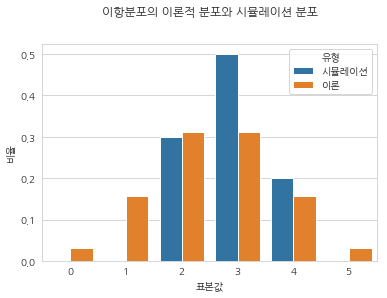

In [71]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포", y=1.1)
plt.show()

In [72]:
x1 = rv1.rvs(10)
x2 = rv1.rvs(1000)
x3 = rv2.rvs(10)
x4 = rv2.rvs(1000)

In [76]:
# x1, x2의 기대값, 분산(이론적 기대값, 분산)
N = 5
mu = 0.5

mean = N * mu
var = N * mu * (1- mu)

mean, var

(2.5, 1.25)

In [77]:
x1.mean(), x1.var(ddof=1)

(2.2, 1.2888888888888888)

In [78]:
x2.mean(), x2.var(ddof=1)

(2.534, 1.242086086086086)

In [80]:
# x3, x4의 이론적 기대값, 분산
N = 20
mu = 0.9

mean = N * mu
var = N * mu * (1 - mu)

mean, var

(18.0, 1.7999999999999996)

In [81]:
x3.mean(), x3.var(ddof=1)

(18.6, 1.1555555555555557)

In [82]:
x4.mean(), x4.var(ddof=1)

(18.082, 1.7169929929929926)

### 베르누이분포와 이항분포의 모수추정

데이터에서 모수의 값을 찾아내는 것을 모수추정(parameter estimation)이라고 한다.

베르누이분포와 이항분포는 공통된 모수  𝜇 를 가진다. 보통은 표본 데이터가 한 개보다 많기 때문에 이항분포가 된다. 추정한 값  𝜇̂  은 다음처럼 계산한다.

$$\hat{\mu} = \dfrac{\sum_{i=1}^N x_i}{N}= \dfrac{N_1}{N}$$

이 식에서  𝑁 은 전체 데이터의 수,  𝑁1 은 1이 나온 횟수이다.

#### 베르누이분포의 활용
베르누이분포는 다음과 같은 경우에 사용된다.

1. 분류예측 문제의 출력 데이터가 두 값으로 구분되는 카테고리값인 경우에 분류 결과 즉, 두 값 중 어느 값이 가능성이 높은지를 표현하는 데 사용된다(베이지안 관점).
2. 입력 데이터가 0 또는 1 혹은 참 또는 거짓, 두 개의 값으로 구분되는 카테고리값인 경우, 두 종류의 값이 나타나는 비율을 표현하는 데 사용된다(빈도주의적 관점).

### 예제1

스팸 메일(spam mail)과 정상 메일을 구분해야 하는 스팸 메일 필터(spam mail filter)를 만들어야 한다고 가정하자. 

스팸 메일 필터를 만들기 위해 특정한 메일 계정으로 들어오는 메일을 모두 분석하였했다. 만약 메일이 모두 10통이고 이 중 6통이 스팸 메일이라면 이 메일 계정으로 들어온 메일이 스팸 메일일 가능성은 60%이다. 이러한 상황은  𝜇=0.6 인 베르누이분포로 나타낼 수 있다.

$$p(y) = \text{Bern}(y; \mu = 0.6)$$

확률변수  𝑌 는 메일이 스팸 메일인지 아닌지를 나타내며  𝑌=1 이면 스팸 메일이다.

### 예제2

+ 이번에는 스팸 메일 필터의 입력 데이터로 베르누이분포를 활용하는 방법을 알아보자. 

+ 스팸 메일은 특정한 단어(키워드)를 가지고 있을 확률이 높다. 

+ 스팸 메일을 구분하기 위한 키워드가 여러 개라면 다음과 같이 BOW(Bag of Words) 인코딩된 벡터로 나타낼 수 있다. 

+ 이 예에서는 키워드 4개를 사용하였다. 

+ 만약 어떤 메일이 첫번째와 세번째 번째 키워드를 포함하고 있으며 두번째와 네번째 번째 키워드는 포함하지 않으면 다음과 같은 특징 벡터로 표시할 수 있다.

$$x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$

여러개의 메일이 있으면 다음처럼 특징 행렬로 표시한다. 특징 행렬에서는 행 벡터가 메일을, 열 벡터가 키워드를 나타낸다.

$$X =
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 \\
\end{bmatrix}$$

이때, 스팸 메일의 특성은 4개의 베르누이 확률변수의 튜플  (𝑋1,𝑋2,𝑋3,𝑋4) 로 나타낼 수 있다.

+ 𝑋1 : 메일이 첫 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수
    
$$p(X_1=1 | Y=1) = \text{Bern}(x_1; \mu_{spam,1})$$

+ 𝑋2 : 메일이 두 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$p(X_2=1 | Y=1) = \text{Bern}(x_2; \mu_{spam,2})$$

+ 𝑋3 : 메일이 세 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$p(X_3=1 | Y=1) = \text{Bern}(x_3; \mu_{spam,3})$$


+ 𝑋4 : 메일이 네 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$p(X_4=1 | Y=1) = \text{Bern}(x_4; \mu_{spam,4})$$


특징 행렬의 각 열로부터 각 베르누이 확률분포의 모수의 추정값을 구하면 다음과 같다.

$$\hat\mu_{spam,1} = \dfrac{5}{6},\;\; \hat\mu_{spam,2} = \dfrac{4}{6},\;\; \hat\mu_{spam,3} = \dfrac{3}{6},\;\; \hat\mu_{spam,4} = \dfrac{3}{6}$$

### Practice 4

(1) 위 예제와 같이 키워드 4개를 사용하는 스팸 메일 필터를 만드는 데 스팸 메일이 아닌 정상 메일 5통을 다음과 같은 특징 행렬로 표시한다고 가정하자.

\begin{bmatrix} 
0 & 0 & 1 & 1 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}

이 정상 메일에 각각의 키워드가 있을 확률을 나타내는 베르누이 확률분포

$$p(X_1=1|Y=0) = \text{Bern}(x_1; \mu_{ham,1})$$

$$p(X_2=1|Y=0) = \text{Bern}(x_2; \mu_{ham,2})$$

$$p(X_3=1|Y=0) = \text{Bern}(x_3; \mu_{ham,3})$$

$$p(X_4=1|Y=0) = \text{Bern}(x_4; \mu_{ham,4})$$

의 모수를 구하라. 우리가 구한 모수에 문제점은 없는가?

(2) 키워드 4개를 사용하는 스팸 메일 필터를 만드는 데 스팸 메일과 정상 메일의 특성을 모두 모형화하려면 베르누이 확률변수가 몇 개 필요한가? 2개

Y = 0 정상메일 

$$\mu_{ham,1} = 0,\;\; , \mu_{ham,2} = \dfrac{1}{5},\;\; , \mu_{ham,3} = \dfrac{3}{5},\;\; , \mu_{ham,4} = 1$$